# 🍀Подключение необходимых библиотек для работ с данными

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import warnings
warnings.simplefilter('ignore')

# 🍀Загружаем данные и проверяем что имеем

In [2]:
df = pd.read_csv("my_df.csv").drop_duplicates()
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5,7,1,34.6,...,NaN,NaN,18.0,8.0,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14,45,1,41.3,...,NaN,Без отделки,20.0,11.0,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10,12,1,34.4,...,NaN,"Без отделки, черновая, чистовая",11.8,11.7,7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4,33,1,42.9,...,NaN,NaN,22.9,15.0,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1,16,1,37.7,...,NaN,NaN,NaN,NaN,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


In [3]:
# проверяем размер файла
df.shape

(10509, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10509 entries, 0 to 10508
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   author                10339 non-null  object 
 1   author_type           10336 non-null  object 
 2   url                   10506 non-null  object 
 3   location              10102 non-null  object 
 4   deal_type             10509 non-null  object 
 5   accommodation_type    10509 non-null  object 
 6   floor                 10509 non-null  int64  
 7   floors_count          10509 non-null  int64  
 8   rooms_count           10509 non-null  int64  
 9   total_meters          10509 non-null  float64
 10  price                 10476 non-null  float64
 11  year_of_construction  8313 non-null   object 
 12  object_type           0 non-null      float64
 13  house_material_type   1242 non-null   object 
 14  heating_type          0 non-null      float64
 15  finish_type        

# 🍀Анализ и чистка данных
Для начала заменим все пропуски данных, которые имеют значение -1 на NaN, для дальнейшей удобной работы с этими данными.<br>
Также заменим floor, floors_count, rooms_count с значения float на int, т.к. этаж, количество этажей в доме и количество комнат не могу быть с плавующей запятой.<br>
В location, rooms_count, price можно заметить что нехватает данных, так что удалим строк в которых нет данных.<br>
За одно сразу удалим лишние столбцы, которые никак не будут влиять на цену квартиры и м2

In [5]:
df = df.replace(-1,np.nan)
df = df.replace("-1",np.nan)
df = df.replace(-1.0,np.nan)
df = df.replace("-1.0",np.nan)
df = df.dropna(subset=['location', 'price', 'rooms_count'])
df['floor'] = df['floor'].astype(int)
df['floors_count'] = df['floors_count'].astype(int)
df['rooms_count'] = df['rooms_count'].astype(int)
df.drop(['phone', 'deal_type', 'accommodation_type', 'object_type', 'heating_type'], axis=1, inplace=True)
print(f'Количество столбцов после чистки {df.shape[1]} столбцы')
# Необходимо в сохранённом файле изменить ��� на 0, для избежания ошибок

Количество столбцов после чистки 19 столбцы


Проверим количество пропущенных значений в столбцах

In [6]:
df.isnull().sum()

author                   146
author_type              146
url                        0
location                   0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price                      0
year_of_construction    2099
house_material_type     8871
finish_type             8458
living_meters           2316
kitchen_meters          1407
district                4476
street                  1393
house_number            1037
underground             3489
residential_complex     5473
dtype: int64

# 🍀Проверка пропусков данных в %

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author - 1%
author_type - 1%
url - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
house_material_type - 88%
finish_type - 84%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# 🍀Удаляём ещё несколько не нужных столбцов, которые не будут влиять на цену квартир


In [8]:
df.drop(['house_material_type', 'finish_type', 'author', 'url'], axis=1, inplace=True)

In [9]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 21%
living_meters - 23%
kitchen_meters - 14%
district - 44%
street - 14%
house_number - 10%
underground - 35%
residential_complex - 54%


# 🍀Проверим на отсутствующие данные с помощью heatmap

<Axes: >

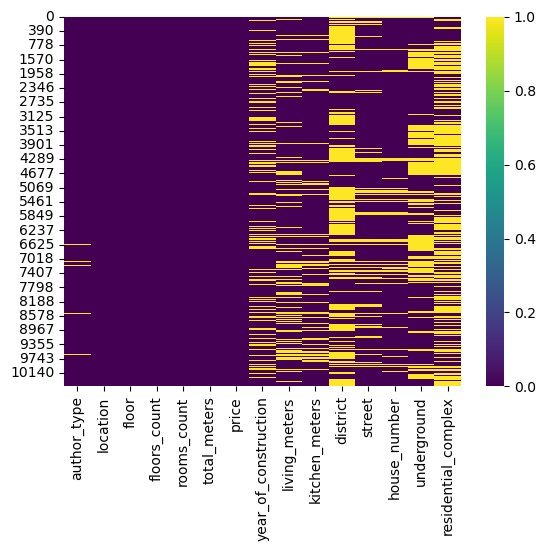

In [10]:
sns.heatmap(df.isnull(), cmap='viridis')

# 🍀Нам сложно будет найти данные о ЖК (residential_complex), и номере дома (house_number)  
Также изменим все не достующие данные в underground и street на NaN

In [11]:
df.drop(['residential_complex', 'house_number'], axis=1, inplace=True)
df = df.dropna(subset=['underground', 'street'])

In [12]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 18%
living_meters - 24%
kitchen_meters - 13%
district - 56%
street - 0%
underground - 0%


# 🍀Сейчас нам необходимо разобраться с пропусками в living_meters и kitchen_meters  
Эти данные буду сильно влиять на образование цены квартиры или м2

In [13]:
df['living_meters'] = df['living_meters'].fillna(df['living_meters'].median()) 
df['kitchen_meters'] = df['kitchen_meters'].fillna(df['kitchen_meters'].median())

In [14]:
# сразу проверим значения после подставки моды
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 18%
living_meters - 0%
kitchen_meters - 0%
district - 56%
street - 0%
underground - 0%


# 🍀Создадим функцию для для замены отсутствия данных в столбце district

In [15]:
df['temp_district'] = df['district']
msk_condition = (df['location'] == 'Москва') & df['district'].isna()
df.loc[msk_condition & df['underground'].notna(), 'temp_district'] = df['underground']
df.loc[msk_condition & df['underground'].isna(), 'temp_district'] = 'Москва'
other_condition = df['district'].isna() & (df['location'] != 'Москва')
df.loc[other_condition, 'temp_district'] = df['location']
df['district'] = df['temp_district']
df.drop(columns=['temp_district'], inplace=True)
# Здесь сначала мы создаём временной столбец для хранения новых данных, после чего заполняем значения для Москвы, а других локаций, копируем данные из временного столбца в столбец 'distirct' нашего файла. 

In [16]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 1%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 0%
total_meters - 0%
price - 0%
year_of_construction - 18%
living_meters - 0%
kitchen_meters - 0%
district - 0%
street - 0%
underground - 0%


<Axes: >

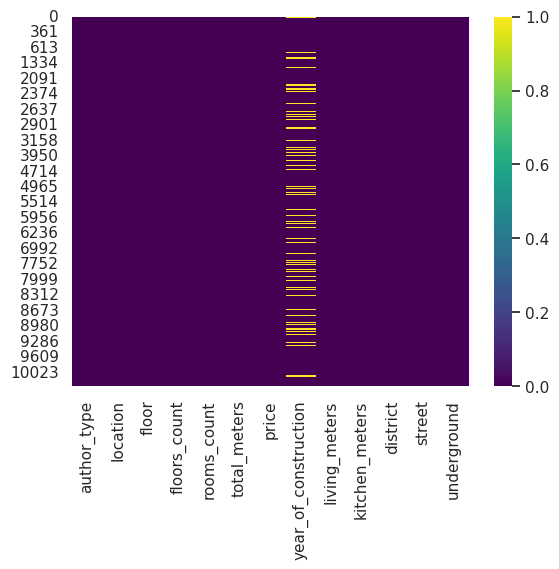

In [24]:
# проверим пропуски после чистки
sns.heatmap(df.isnull(), cmap='viridis')

# 🍀Сделаем функцию для расчёт средней цены м²

In [17]:
dict_city = df['location'].unique()

def price_for_meter(location):
    city = df[df['location'] == location]
    price_for_city = city['price'].sum()
    
    clean_data = city['total_meters'].sum()
    
    return round(price_for_city/clean_data, 2)

with open('info.csv', 'w', newline='', encoding='UTF-8') as csvfile:
    names = ['city', 'price_for_meter']
    writer = csv.DictWriter(csvfile, fieldnames=names)
    writer.writeheader()
    for city in dict_city:
        writer.writerow({'city': city, 'price_for_meter': price_for_meter(city)})

In [18]:
info = pd.read_csv('sorted_info.csv')
info_sorted = info.sort_values(by='price_for_meter', ascending=False)

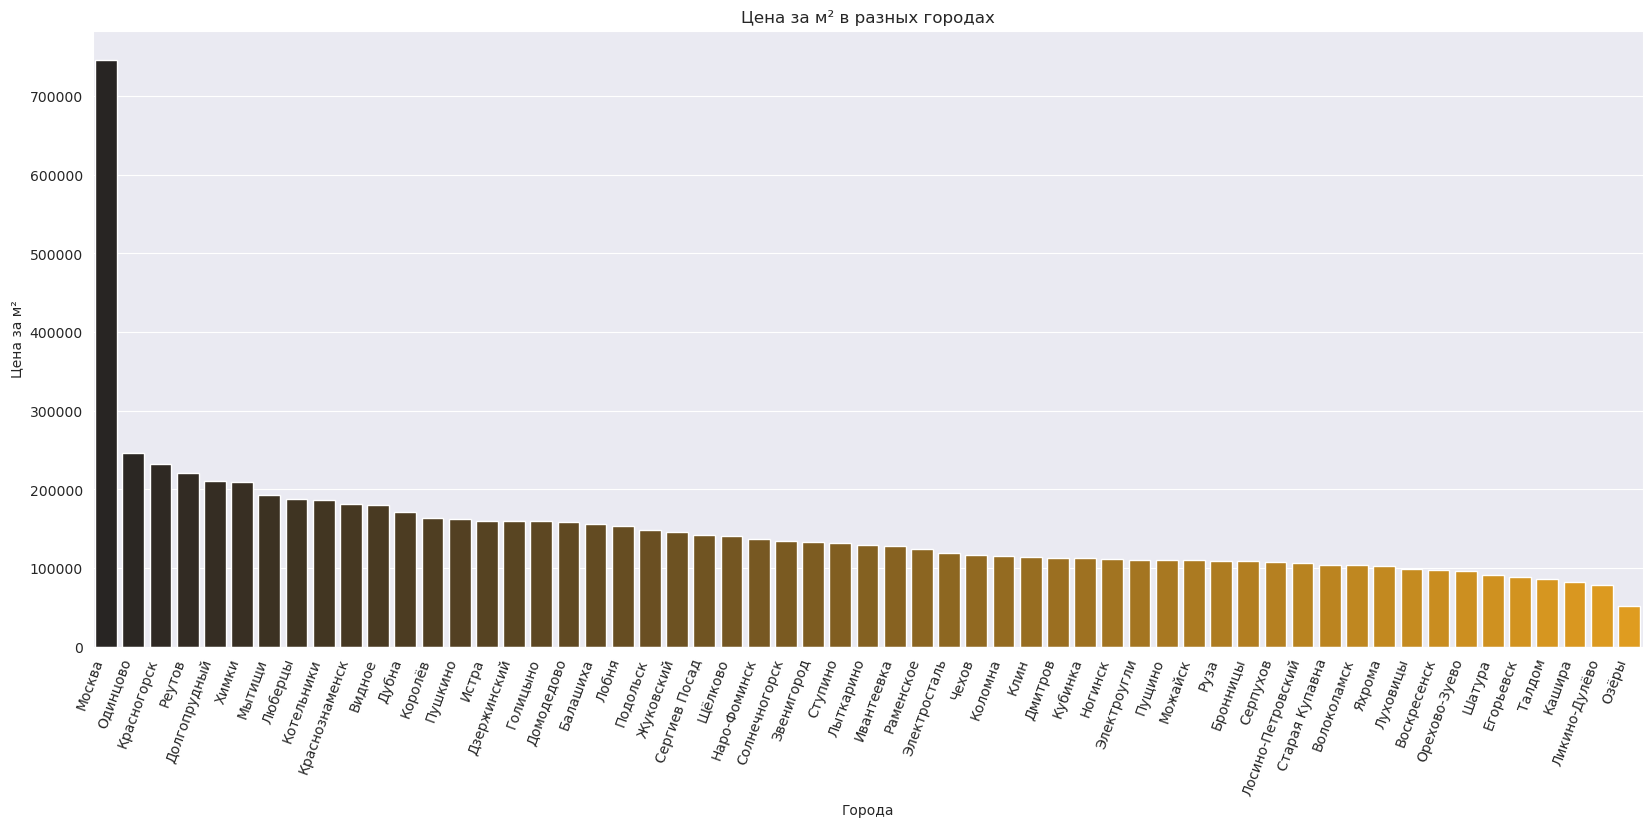

In [19]:
# График для средней цены за м2 во всех городах
sns.set_style("darkgrid")
info = pd.read_csv('sorted_info.csv')
plt.figure(figsize=(20, 8))
sns.barplot(hue='city', legend=False, x='city', y='price_for_meter', data=info, color='Orange')
plt.title('Цена за м² в разных городах')
plt.xlabel('Города')
plt.ylabel('Цена за м²')
plt.xticks(rotation=70, ha='right')
plt.show()

# 🍀Функция для кодирования данных и проверки их на зависимости

In [20]:
from sklearn import preprocessing
#функция, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy() #копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() #для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) #применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground
0,3,23,5,7,1,34.6,9000000.0,63,18.0,8.0,143,627,332
1,3,23,14,45,1,41.3,12800000.0,111,20.0,11.0,105,1073,168
2,0,23,10,12,1,34.4,19372498.0,111,11.8,11.7,124,1293,225
3,3,23,4,33,1,42.9,23600000.0,117,22.9,15.0,116,170,4
4,4,23,1,16,1,37.7,9450000.0,67,28.5,10.1,177,761,224


<Axes: >

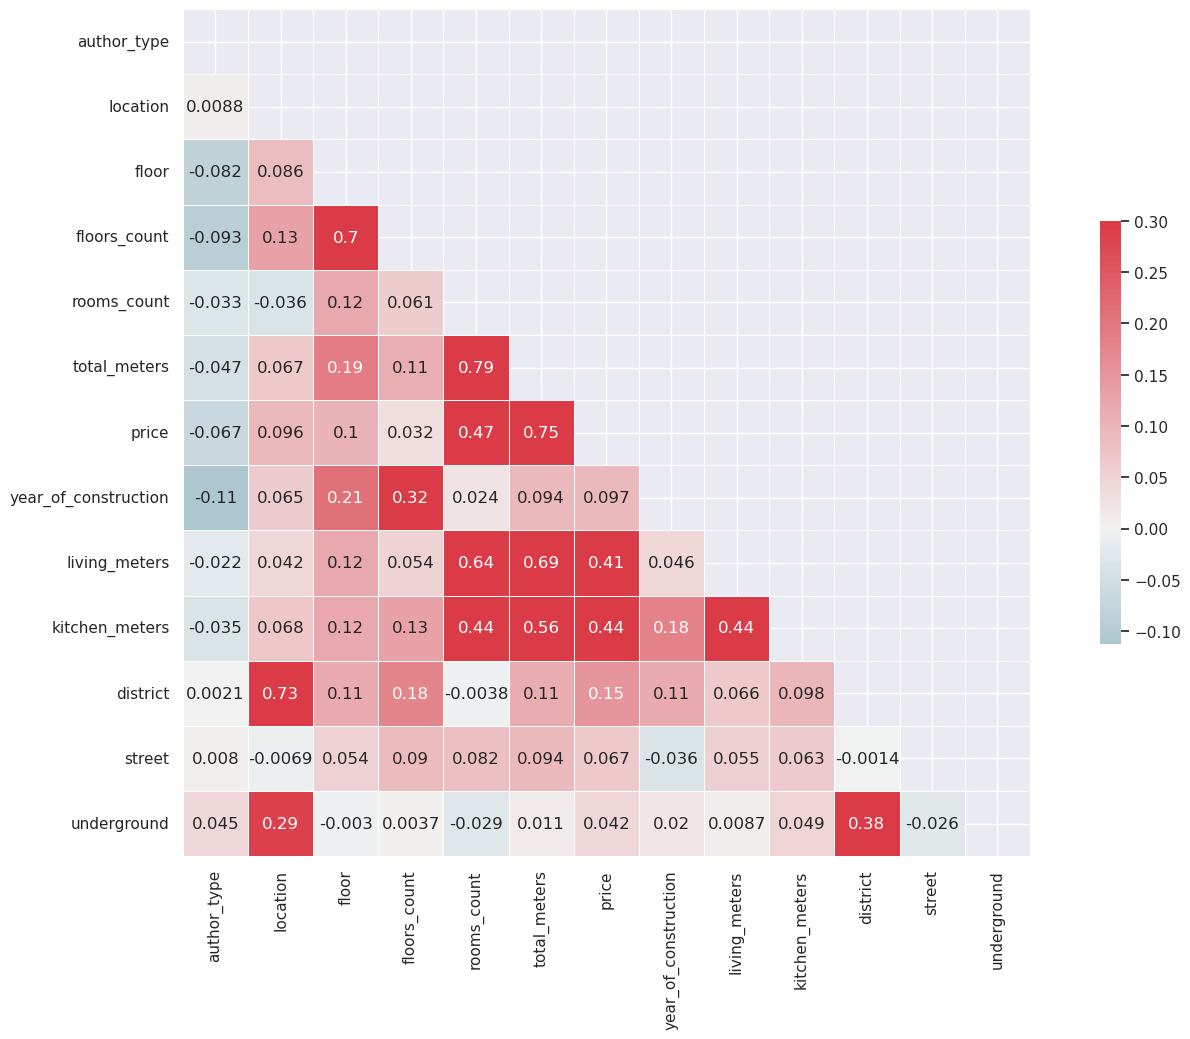

In [21]:
sns.set(style="darkgrid")


temp3 = encoded_data.copy()
corr = temp3.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 11))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Figure size 640x480 with 0 Axes>

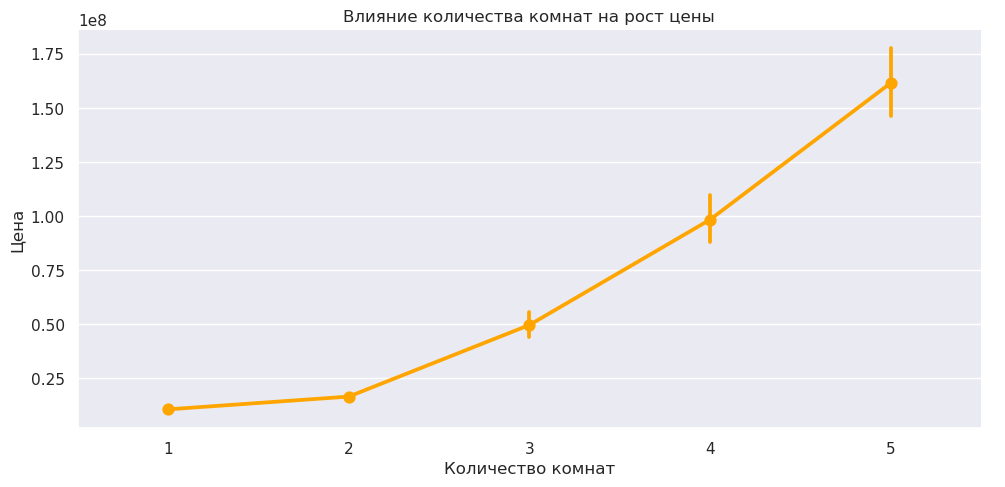

In [22]:
plt.figure()
sns.catplot(x='rooms_count', y='price', data=encoded_data, kind='point', aspect=2, color='orange')
plt.title("Влияние количества комнат на рост цены")
plt.xlabel("Количество комнат")
plt.ylabel("Цена")
plt.show()

🍀После вывода графиков, мы можем понять, что самая большая цена за м² в Москве.  
🍀Смотря по тепловой карте, можно увидеть что самым главным фактором который влияет на цену квартир является площадь квартиры  
🍀Также не мало важным фактором ценообразования квартиры является количество комнат